<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.org/regression/"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset**
---

In [4]:
bostonDataSet = get_data("boston")    # SN is 46
# Boston is regression dataset.
# The values in "medv" columns are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 "Parameter setting"  for all regression models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [5]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', train_size=0.7, silent=True)

,Description,Value
0,session_id,7652
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.4 "Run and Compare" the model performance**
---

In [6]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1103,9.3360,2.9470,0.8769,0.1272,0.1011,0.449
gbr,Gradient Boosting Regressor,2.1609,8.6834,2.8797,0.8733,0.1353,0.1080,0.092
rf,Random Forest Regressor,2.2966,10.6946,3.1790,0.8544,0.1383,0.1106,0.508
lightgbm,Light Gradient Boosting Machine,2.3252,10.9633,3.1984,0.8537,0.1482,0.1153,0.079
dt,Decision Tree Regressor,2.7961,14.3194,3.7199,0.7881,0.1701,0.1347,0.016
ada,AdaBoost Regressor,2.8739,15.4605,3.8208,0.7873,0.1719,0.1450,0.094
ridge,Ridge Regression,3.3885,24.5505,4.8168,0.6874,0.2447,0.1726,0.012
lr,Linear Regression,3.4147,24.4837,4.8157,0.6859,0.2474,0.1733,0.263
br,Bayesian Ridge,3.3885,24.8357,4.8460,0.6855,0.2406,0.1707,0.013
lar,Least Angle Regression,3.5937,26.2305,4.9869,0.6657,0.2545,0.1814,0.015


---
### **1.5 "Three line of code" for model comparison for "Insurance" dataset**
---



In [7]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2405.1586,2.088975e+07,4505.5010,0.8504,0.4281,0.2923,0.082
lightgbm,Light Gradient Boosting Machine,2684.6458,2.239198e+07,4683.6222,0.8397,0.5544,0.3523,0.049
rf,Random Forest Regressor,2584.2809,2.318881e+07,4760.5838,0.8331,0.4754,0.3334,0.558
ada,AdaBoost Regressor,3861.1489,2.612341e+07,5078.7023,0.8122,0.6257,0.7026,0.031
et,Extra Trees Regressor,2538.2819,2.616904e+07,5071.0653,0.8091,0.4892,0.3325,0.508
llar,Lasso Least Angle Regression,4210.9462,3.599896e+07,5947.9134,0.7471,0.5928,0.4476,0.015
lar,Least Angle Regression,4215.4582,3.600628e+07,5948.4592,0.7470,0.6383,0.4495,0.016
lr,Linear Regression,4218.7978,3.601696e+07,5949.4952,0.7469,0.6176,0.4494,0.015
lasso,Lasso Regression,4218.0227,3.601054e+07,5948.9932,0.7469,0.6153,0.4492,0.014
br,Bayesian Ridge,4225.9052,3.601585e+07,5949.6952,0.7469,0.6195,0.4506,0.014


---
### **1.6 "Three line of code" for model comparison for "House" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.834831e+04,9.735542e+08,3.021823e+04,8.538000e-01,0.1489,0.1070,0.654
lightgbm,Light Gradient Boosting Machine,1.825779e+04,9.947096e+08,3.065919e+04,8.504000e-01,0.1489,0.1061,0.218
rf,Random Forest Regressor,1.957301e+04,1.114717e+09,3.229550e+04,8.336000e-01,0.1617,0.1158,2.215
ridge,Ridge Regression,2.022109e+04,1.403737e+09,3.469730e+04,8.022000e-01,0.1793,0.1190,0.045
et,Extra Trees Regressor,2.269403e+04,1.321185e+09,3.581559e+04,7.892000e-01,0.1788,0.1312,2.480
omp,Orthogonal Matching Pursuit,1.911499e+04,1.543097e+09,3.601483e+04,7.736000e-01,0.1682,0.1105,0.036
en,Elastic Net,2.181354e+04,1.685348e+09,3.802483e+04,7.662000e-01,0.1719,0.1263,0.208
ada,AdaBoost Regressor,2.580085e+04,1.557697e+09,3.885574e+04,7.574000e-01,0.2092,0.1659,0.424
lasso,Lasso Regression,2.132818e+04,1.769666e+09,3.900649e+04,7.381000e-01,0.2077,0.1272,0.203
br,Bayesian Ridge,2.580875e+04,2.083038e+09,4.299893e+04,7.056000e-01,0.2056,0.1498,0.265


---
# **2. Regression: working with user dataset**
---
#### **2.1 Uploading "user file" from user system**

In [9]:
from google.colab import files
#files.upload()                     # Uncomment this line

#### **2.2 "Read" the uploaded file**

In [10]:
import pandas as pd
#myDataSet = pd.read_csv('Sample1 - Regression data.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                                # Uncomment this line

#### **2.3 "Compare" the model performance**

In [11]:
from pycaret.datasets import get_data
from pycaret.regression import *

#s = setup(data = myDataSet, target='RMSD', silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

#### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine

In [12]:
from pycaret.datasets import get_data
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [13]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.9796,7.9414,2.7881,0.8866,0.1352,0.1043,0.090
rf,Random Forest Regressor,2.1491,9.2342,2.9757,0.8663,0.1414,0.1121,0.499
et,Extra Trees Regressor,2.0961,10.0243,3.0443,0.8584,0.1390,0.1076,0.446
lightgbm,Light Gradient Boosting Machine,2.3149,11.7787,3.3562,0.8324,0.1555,0.1196,0.037
ada,AdaBoost Regressor,2.6620,12.8721,3.5426,0.8155,0.1735,0.1444,0.093
dt,Decision Tree Regressor,2.7450,14.1270,3.6712,0.8056,0.1831,0.1430,0.016
knn,K Neighbors Regressor,2.7726,16.9215,4.0257,0.7726,0.1697,0.1330,0.062
ridge,Ridge Regression,3.2699,21.9622,4.6220,0.7019,0.2528,0.1648,0.014
lar,Least Angle Regression,3.2868,21.9964,4.6264,0.7015,0.2541,0.1655,0.017
lr,Linear Regression,3.2873,22.0115,4.6277,0.7013,0.2539,0.1655,0.013


### **3.2 Model performance using "Feature Selection"**

In [14]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1393,11.8754,3.2488,0.8472,0.1394,0.1078,0.456
gbr,Gradient Boosting Regressor,2.2495,12.8663,3.3649,0.8331,0.1495,0.1138,0.091
rf,Random Forest Regressor,2.3187,13.6786,3.4651,0.8237,0.1517,0.1173,0.498
lightgbm,Light Gradient Boosting Machine,2.4344,14.1006,3.5909,0.8184,0.1564,0.1205,0.036
ada,AdaBoost Regressor,2.6166,15.0069,3.6555,0.8080,0.1696,0.1371,0.091
ridge,Ridge Regression,3.0954,20.8258,4.4253,0.7341,0.2380,0.1582,0.013
lr,Linear Regression,3.1309,20.8862,4.4480,0.7322,0.2456,0.1590,0.013
br,Bayesian Ridge,3.1242,21.1197,4.4460,0.7319,0.2317,0.1598,0.014
lar,Least Angle Regression,3.1464,21.0149,4.4678,0.7302,0.2466,0.1597,0.016
dt,Decision Tree Regressor,3.2185,22.6074,4.4767,0.7090,0.2011,0.1638,0.016


### **3.3 Model performance using "Outlier Removal"**

In [15]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1509,9.0460,2.9463,0.8724,0.1404,0.1103,0.088
et,Extra Trees Regressor,2.1338,9.7316,2.9783,0.8671,0.1334,0.1047,0.432
rf,Random Forest Regressor,2.2328,10.5875,3.1513,0.8478,0.1419,0.1114,0.510
lightgbm,Light Gradient Boosting Machine,2.3891,11.9580,3.3739,0.8231,0.1480,0.1177,0.035
ada,AdaBoost Regressor,2.7373,15.5227,3.7619,0.7860,0.1782,0.1460,0.090
dt,Decision Tree Regressor,2.8407,15.6998,3.8518,0.7754,0.1825,0.1446,0.017
ridge,Ridge Regression,3.2399,22.3768,4.6527,0.7046,0.2543,0.1637,0.013
lr,Linear Regression,3.2708,22.3873,4.6567,0.7036,0.2540,0.1652,0.012
br,Bayesian Ridge,3.2424,22.6177,4.6810,0.7006,0.2535,0.1640,0.015
huber,Huber Regressor,3.2834,26.6480,5.0519,0.6551,0.2665,0.1629,0.040


---
### **3.4 Model performance using "Transformation"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.0769,8.0756,2.7996,0.8997,0.1393,0.1104,0.086
et,Extra Trees Regressor,2.1305,9.8621,3.0699,0.8827,0.1402,0.1102,0.443
rf,Random Forest Regressor,2.2577,10.8568,3.2108,0.8673,0.1507,0.1190,0.500
lightgbm,Light Gradient Boosting Machine,2.3736,12.2227,3.3951,0.8512,0.1559,0.1217,0.036
knn,K Neighbors Regressor,2.8195,17.2639,4.0717,0.7977,0.1745,0.1371,0.063
ada,AdaBoost Regressor,3.0413,17.6510,4.1391,0.7859,0.1951,0.1663,0.089
dt,Decision Tree Regressor,3.0505,22.5233,4.5787,0.7323,0.2000,0.1580,0.016
br,Bayesian Ridge,3.4998,22.9799,4.7109,0.7299,0.2260,0.1829,0.016
ridge,Ridge Regression,3.5377,23.0730,4.7249,0.7288,0.2280,0.1849,0.013
lar,Least Angle Regression,3.5552,23.1595,4.7355,0.7277,0.2289,0.1857,0.016


---
### **3.5 Model performance using "PCA"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,5.2904,58.0260,7.5144,0.3019,0.3018,0.2535,0.032
knn,K Neighbors Regressor,5.2758,58.0242,7.5224,0.3001,0.3030,0.2575,0.062
et,Extra Trees Regressor,5.1633,59.8830,7.6236,0.2846,0.3058,0.2542,0.397
rf,Random Forest Regressor,5.2196,60.1778,7.6383,0.2836,0.3069,0.2581,0.449
gbr,Gradient Boosting Regressor,5.2257,59.8456,7.6393,0.2792,0.3033,0.2517,0.062
br,Bayesian Ridge,5.6060,64.5625,7.9717,0.2169,0.3180,0.2727,0.013
lasso,Lasso Regression,5.5851,64.6176,7.9761,0.2149,0.3178,0.2713,0.014
en,Elastic Net,5.5842,64.6464,7.9780,0.2144,0.3179,0.2713,0.013
lr,Linear Regression,5.5825,64.6514,7.9787,0.2141,0.3180,0.2713,0.012
lar,Least Angle Regression,5.5825,64.6515,7.9787,0.2141,0.3180,0.2713,0.013


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [18]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2084,8.9967,2.9693,0.8875,0.1407,0.1113,0.087
et,Extra Trees Regressor,2.1814,10.1922,3.1330,0.8756,0.1408,0.1096,0.442
rf,Random Forest Regressor,2.3622,11.3716,3.3146,0.8616,0.1512,0.1192,0.498
lightgbm,Light Gradient Boosting Machine,2.4266,12.1880,3.3919,0.8553,0.1525,0.1203,0.036
ada,AdaBoost Regressor,2.6911,13.5652,3.6386,0.8332,0.1767,0.1451,0.088
knn,K Neighbors Regressor,2.8183,16.9462,4.0405,0.7920,0.1661,0.1317,0.062
dt,Decision Tree Regressor,2.8401,20.0918,4.3587,0.7537,0.1857,0.1367,0.015
br,Bayesian Ridge,3.5266,25.4970,4.9737,0.6907,0.2566,0.1723,0.015
ridge,Ridge Regression,3.5788,25.6369,4.9957,0.6865,0.2612,0.1752,0.014
lar,Least Angle Regression,3.6001,25.7594,5.0107,0.6842,0.2633,0.1763,0.017


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [19]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1781,11.2792,3.1373,0.8450,0.1500,0.1125,0.086
et,Extra Trees Regressor,2.2830,12.5030,3.3389,0.8281,0.1509,0.1167,0.446
rf,Random Forest Regressor,2.3698,13.6913,3.4720,0.8108,0.1606,0.1223,0.494
lightgbm,Light Gradient Boosting Machine,2.6025,16.5901,3.8494,0.7658,0.1784,0.1338,0.038
ada,AdaBoost Regressor,2.8374,17.4871,3.9577,0.7644,0.1883,0.1538,0.096
knn,K Neighbors Regressor,2.8752,19.9504,4.2378,0.7392,0.1805,0.1407,0.062
br,Bayesian Ridge,3.3316,21.4273,4.5141,0.7046,0.2191,0.1771,0.014
ridge,Ridge Regression,3.3936,21.4668,4.5309,0.7021,0.2192,0.1795,0.013
lr,Linear Regression,3.4321,21.5769,4.5498,0.6994,0.2199,0.1810,0.012
huber,Huber Regressor,3.2540,22.4294,4.5854,0.6977,0.2240,0.1705,0.028


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.org/regression/"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [20]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3969,10.5059,3.2413,0.8242,0.1691,0.1360
1,2.0651,7.0634,2.6577,0.8923,0.1242,0.1033
2,1.8901,7.3170,2.7050,0.9004,0.1155,0.0888
3,2.7111,12.3837,3.5190,0.8990,0.1494,0.1227
4,1.7692,6.9272,2.6320,0.9037,0.1005,0.0800
5,2.8144,20.9356,4.5755,0.6646,0.1870,0.1534
6,2.1486,7.5904,2.7551,0.8861,0.1500,0.1259
7,2.5876,26.2387,5.1224,0.5984,0.1675,0.0978
8,1.5917,4.3356,2.0822,0.9244,0.1252,0.0981
9,2.7245,14.0382,3.7468,0.8610,0.2365,0.2010


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.org/regression/#create-model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [21]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.680000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.437000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.274000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.071001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.562001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,23.979000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.383000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.406000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.641000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.271000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

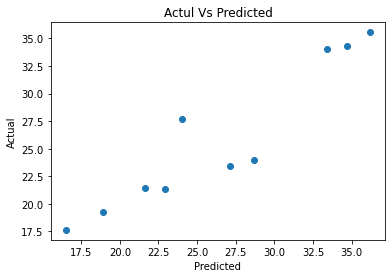

In [23]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 "Save" the prediction results to csv** 
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.7 Download the "result file" to user local system** 
---

In [25]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.8 "Save" the trained model** 
---

In [26]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **4.9 Download the "trained model file" to user local system** 
---

In [27]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
#### **4.10.1 Upload the  "Trained Model"**


In [28]:
from google.colab import files
#files.upload()                    # Uncomment this line

#### **4.10.2 Load the "Model"**

In [29]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

#### **4.10.3 Make the prediction on "new unseen dataSet"**

In [30]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.680000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.437000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.274000
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.071001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.562001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,23.979000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.383000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.406000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,17.641000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.271000


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [31]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3969,10.5059,3.2413,0.8242,0.1691,0.1360
1,2.0651,7.0634,2.6577,0.8923,0.1242,0.1033
2,1.8901,7.3170,2.7050,0.9004,0.1155,0.0888
3,2.7111,12.3837,3.5190,0.8990,0.1494,0.1227
4,1.7692,6.9272,2.6320,0.9037,0.1005,0.0800
5,2.8144,20.9356,4.5755,0.6646,0.1870,0.1534
6,2.1486,7.5904,2.7551,0.8861,0.1500,0.1259
7,2.5876,26.2387,5.1224,0.5984,0.1675,0.0978
8,1.5917,4.3356,2.0822,0.9244,0.1252,0.0981
9,2.7245,14.0382,3.7468,0.8610,0.2365,0.2010


---
### **5.2 Plot the "error"**
---

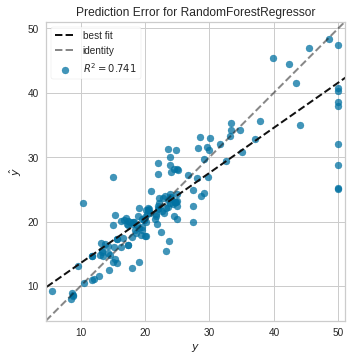

In [32]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

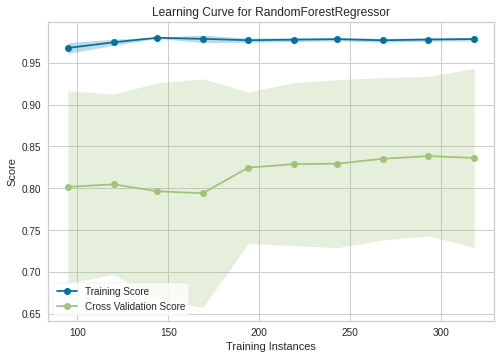

In [33]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

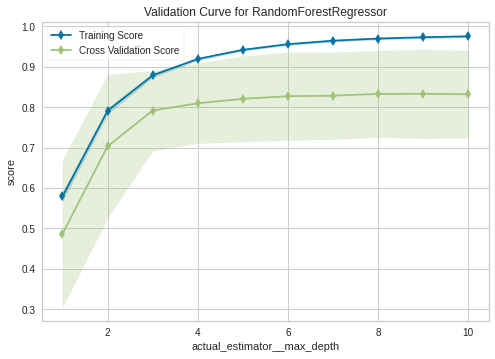

In [34]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [35]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.org/regression/#plot-model"> Click Here </a>**

---
# **6. Feature Importance**
---
#### **6.1 Feature Importance using "Random Forest"**


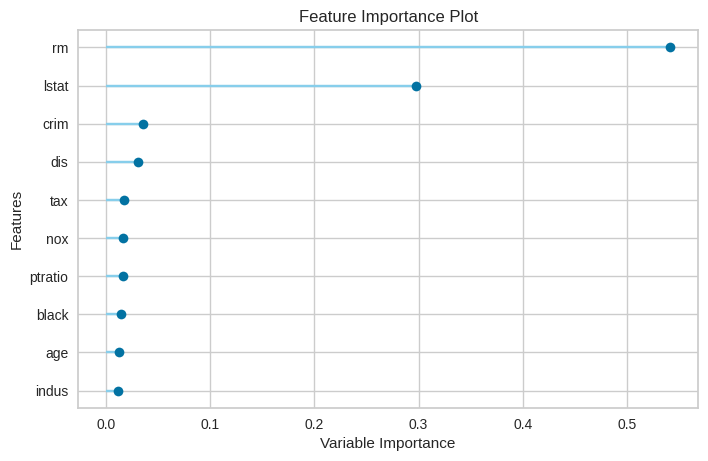

In [36]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

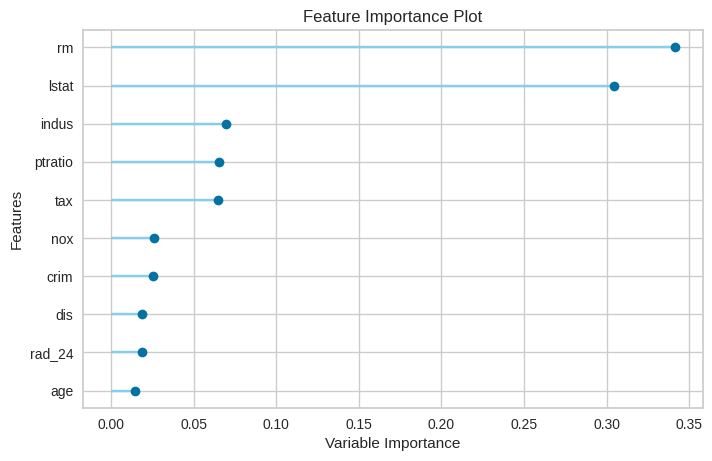

In [37]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

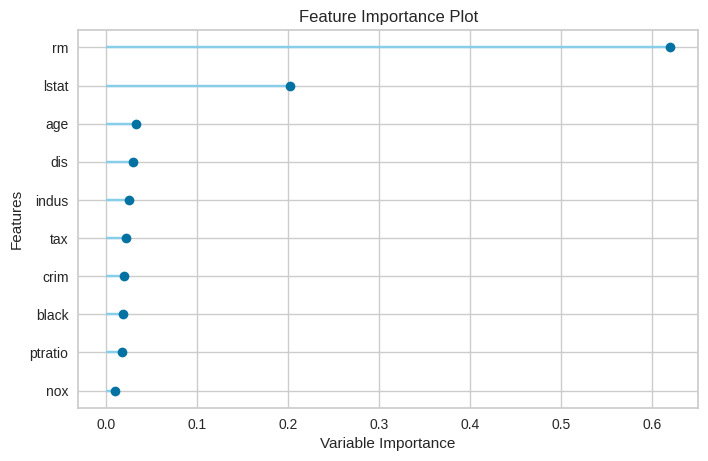

In [38]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [46]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3944,9.6728,3.1101,0.8381,0.1632,0.1331
1,3.3417,33.7814,5.8122,0.4851,0.2103,0.1654
2,2.7083,13.5175,3.6766,0.8160,0.1831,0.1355
3,3.0889,15.9889,3.9986,0.8696,0.1738,0.1438
4,2.6286,12.5354,3.5405,0.8257,0.1316,0.1126
5,3.0800,18.0457,4.2480,0.7109,0.1829,0.1643
6,2.6400,15.3457,3.9174,0.7698,0.1733,0.1379
7,3.1971,33.3226,5.7726,0.4900,0.2204,0.1296
8,1.9857,5.9751,2.4444,0.8958,0.1559,0.1197
9,2.5714,14.4903,3.8066,0.8565,0.2282,0.1851


#### **Get the "parameters" of Decision Tree**

In [47]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [48]:
dtModelTuned = tune_model(dtModel, n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6801,13.6246,3.6912,0.7720,0.1949,0.1535
1,2.3162,8.4692,2.9102,0.8709,0.1565,0.1252
2,2.4846,11.1098,3.3331,0.8488,0.1401,0.1152
3,3.5658,21.6518,4.6531,0.8234,0.1823,0.1552
4,2.4442,13.6526,3.6949,0.8102,0.1553,0.1155
5,2.9704,22.8600,4.7812,0.6338,0.1811,0.1555
6,2.5763,12.7402,3.5693,0.8089,0.1530,0.1272
7,3.2508,33.7557,5.8100,0.4833,0.2077,0.1307
8,2.0734,7.0376,2.6529,0.8772,0.1631,0.1179
9,2.7509,12.6494,3.5566,0.8747,0.2298,0.1998


#### **Get the "tuned parameters" of Decision Tree**

In [49]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,16
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.0005
min_impurity_split,None
min_samples_leaf,5
min_samples_split,5
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.org/regression/#tune-model"> Click Here </a>**

---
# **8. Deploy the model on AWS**
---
**<a href="https://pycaret.org/regression#deploy-model">Click Here</a>**
